In [327]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [328]:
class Teleport(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[0] > system->xhi){
            me->x[0] = system->xlo + 0.55;
        }
        me->x[2] = 0;
        me->rho = 250.0;
        """

In [329]:
class HardFloor(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[1] < 0.4){
            me->x[1] = 0.5;
            me->v[1] = 0.0;
        }
        """

In [330]:
class HardWall(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[0] < 1){
            me->x[0] = system->xlo + 0.5;
            me->v[1] = 0.0;
        }
        """

In [331]:
class weir(spatialpy.Model):
    def __init__(self, model_name="weir_aka_backward_facing_step"):
        spatialpy.Model.__init__(self, model_name)

        xmax = 35.1
        ymax = 10.1

        # Construct mesh for backward facing step
        self.mesh = spatialpy.Mesh(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        for x in numpy.arange(start=0, stop=xmax, step=0.2):
            for y in numpy.arange(start=0, stop=ymax, step=0.2):
                # Top and bottom
                if y == 0 or y == 10:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Water
                elif y > 1.5 and y < 8 and x > 1.5 and x < 8:
                    self.mesh.add_point([x,y,0], type=2, mass=10.0, vol=1.0, nu=1.0, fixed=False)
                # Step
                elif x >= 10 and x <= 15 and y > 0 and y < 5:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Walls 
                elif x == 0 or x == 35:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)


        # Teleport particles back to start to simulate flow
        self.add_boundary_condition(Teleport())
        self.add_boundary_condition(HardFloor())
        #self.add_boundary_condition(HardWall())
        # Velocity
        #self.add_boundary_condition(spatialpy.BoundaryCondition(
        #    type_id=2,
        #    property = 'v',
        #   value    = [0.005, 0.0, 0.0] 
        #))

        self.staticDomain = False

        # Define time parameters
        self.timestep_size = 1e-3  # timestep size
        #self.num_timesteps = 50000    # number of timesteps
        self.num_timesteps = 200000    # number of timesteps
        self.output_freq = 400      # frequency of outputting results

In [332]:
model = weir()

In [333]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()

In [334]:
%time result = sol.run()

CPU times: user 47 ms, sys: 26.7 ms, total: 73.6 ms
Wall time: 28min 48s


In [335]:
def mpl_plot_property(t_ndx=0):
        import matplotlib.pyplot as plt
        
        points, data = result.read_step(t_ndx)

        d = data["type"]

        plt.figure(figsize=(6.4, 4.8))
        plt.scatter(points[:,0],points[:,1], c=d)
        plt.axis('scaled')
        #plt.colorbar()
        #plt.title("title")
        plt.grid(linestyle='', linewidth=1)
        plt.plot()
        return

In [336]:
timespan = []
for i,t in enumerate(result.get_timespan()):
    timespan.append(i)
print(timespan)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

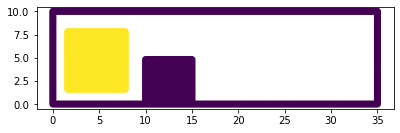

In [337]:
mpl_plot_property(0)

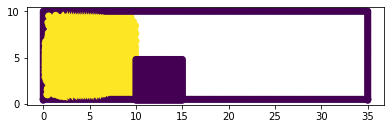

In [338]:
mpl_plot_property(1)

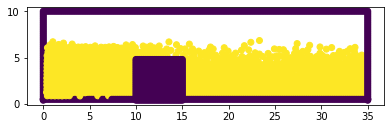

In [339]:
mpl_plot_property(500)